Fraud detection (Anamoly Detection problem using Machine Learning)

In [1]:
##importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## not to print everytime visulization diagram
%matplotlib inline

C:\Users\91626\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
##loading dataset
df=pd.read_csv("fraud.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


EDA(exploratory data analysis)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
##checking for null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
##no of transactions are fraud and legit
fraud=df[df.isFraud==1]
legit=df[df.isFraud==0]

In [8]:
lfraud=len(fraud)
llegit=len(legit)
print(lfraud)
print(llegit)

8213
6354407


In [9]:
##percentage of transactions legit or fraud
legit_percentage=(llegit/(llegit+lfraud))*100
fraud_percentage=100-legit_percentage
print(legit_percentage)
print(fraud_percentage)

99.87091795518198
0.12908204481801988


<AxesSubplot:>

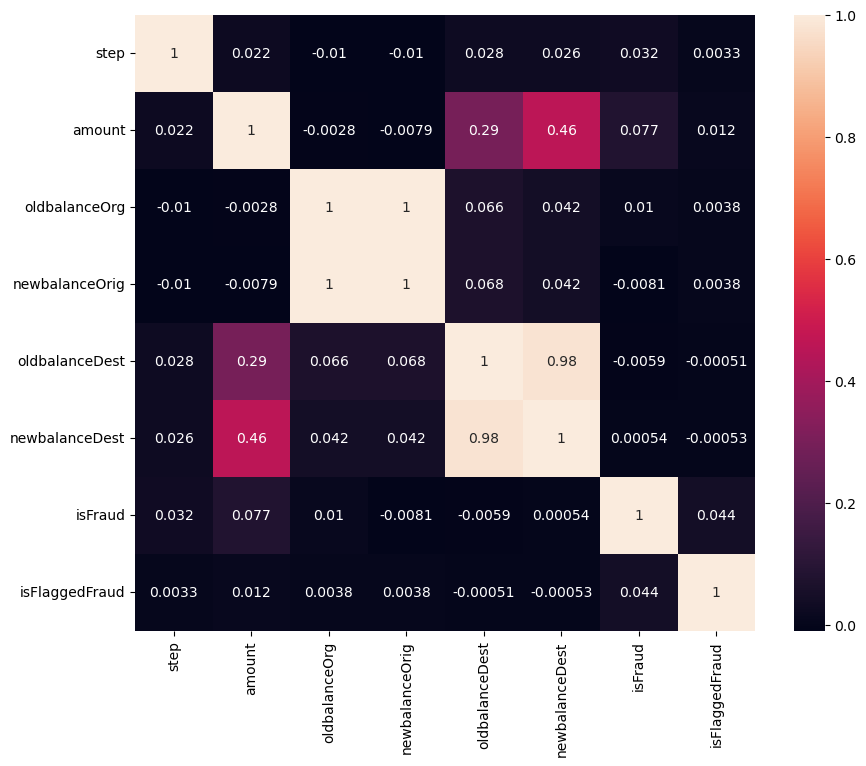

In [10]:
##correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
## from this we can see the features oldbalanceorg,newbalanceorg and  oldbalancedest,newbalancedest are highly correlated

Text(0, 0.5, 'Frequency')

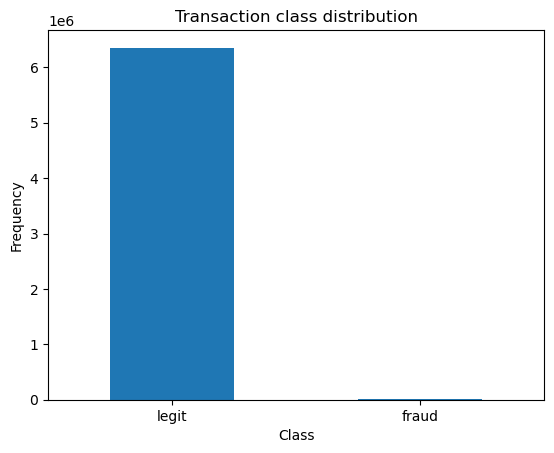

In [11]:
count_classes=pd.value_counts(df['isFraud'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Transaction class distribution")
LABELS=['legit','fraud']
plt.xticks(range(2),LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

By the above visulation we can come to a conclusion that it is an imbalanced dataset where outliers have a huge role so it is anamoly detection problem in machine learning problems where we use isolation forest,local outlier factor anomaly detection for model selection and prediction.

In [12]:
fraud.amount.describe()


count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [13]:
legit.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

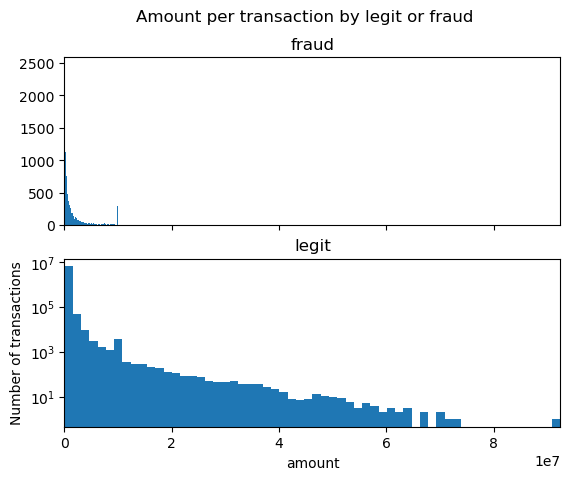

In [14]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by legit or fraud')
bins=60
ax1.hist(fraud.amount,bins=bins)
ax1.set_title('fraud')
ax2.hist(legit.amount,bins=bins)
ax2.set_title('legit')
plt.xlabel('amount')
plt.ylabel('Number of transactions')
plt.xlim((0,9.244552e+07	))
plt.yscale('log')
plt.show

By the help of above visulisation we can see that fraud transaction only happen for smaller amount

In [15]:
##converting datatypes into numeric of features for model training
new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [16]:
objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [17]:
##label encoding for numeric conversion we can also use one hot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))
print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [18]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [19]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.Thus combine these pairs of collinear attributes and drop the individual ones.


In [20]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,type,1.092685
1,amount,3.760248
2,isFraud,1.176099
3,isFlaggedFraud,1.002478
4,Actual_amount_orig,1.212137
5,Actual_amount_dest,3.692456


<AxesSubplot:>

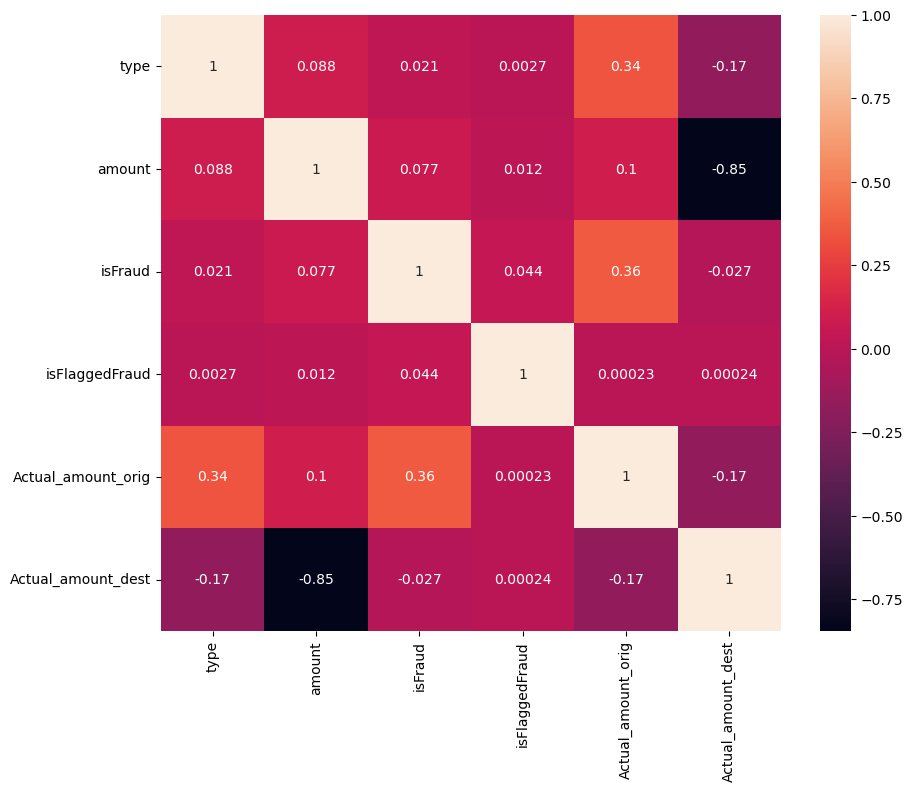

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr(),annot=True)

In [22]:
new_df

,type,amount,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest
0,3,9839.64,0,0,9839.64,0.00
1,3,1864.28,0,0,1864.28,0.00
2,4,181.00,1,0,181.00,0.00
3,1,181.00,1,0,181.00,21182.00
4,3,11668.14,0,0,11668.14,0.00
...,...,...,...,...,...,...
6362615,1,339682.13,1,0,339682.13,-339682.13
6362616,4,6311409.28,1,0,6311409.28,0.00
6362617,1,6311409.28,1,0,6311409.28,-6311409.27
6362618,4,850002.52,1,0,850002.52,0.00


In [23]:
## we perform scaling in amount because the larger amount transactions in the visulisation diagram are not having any fraud
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

In [24]:
##we can take the whole dataset but for training the models mentioned above for imbalenced dataset we can take sample which will reduce the execution time for the training of model and result are almost similar to full sample
new_df1=new_df.sample(frac=0.1,random_state=1)
new_df1.shape

(636262, 6)

In [25]:
Fraud=new_df1[new_df1.isFraud==1]
Legit=new_df1[new_df1.isFraud==0]
##outlier fraction
outlier_fraction=len(Fraud)/len(Legit)


In [26]:
print(outlier_fraction)
print(len(Fraud))
print(len(Legit))

0.0012888646188564514
819
635443


In [27]:
Y=new_df1['isFraud']
X=new_df1.drop(["isFraud"],axis=1)

In [28]:
##Isolation forest algorithm it works on anamoly score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


Model Prediction
Now it is time to start building the model .The types of algorithms we are going to use to try to do anomaly detection on this dataset are as follows

Isolation Forest Algorithm :
One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

How Isolation Forests Work The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.

Local Outlier Factor(LOF) Algorithm :
The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

In [31]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=1, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)
}

In [32]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))
   

C:\Users\91626\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 1122
Accuracy Score :
0.9982365754987725
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635443
           1       0.32      0.32      0.32       819

    accuracy                           1.00    636262
   macro avg       0.66      0.66      0.66    636262
weighted avg       1.00      1.00      1.00    636262

Local Outlier Factor: 1632
Accuracy Score :
0.9974350189073055
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635443
           1       0.00      0.00      0.00       819

    accuracy                           1.00    636262
   macro avg       0.50      0.50      0.50    636262
weighted avg       1.00      1.00      1.00    636262



Observations :
Isolation Forest detected 1122 errors versus Local Outlier Factor detecting 1632 errors detecting 
Isolation Forest has a 99.82% more accurate than LOF of 99.74% 
When comparing error precision & recall for 3 models , the Isolation Forest performed much better than the LOF as we can see that the detection of fraud cases is around 32 % versus LOF detection rate of 0% 
So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.
We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases

What kind of prevention should be adopted while company update its infrastructure
Use smart vertified apps only.
Browse through secured websites.
Use secured internet connections (USE VPN).
Keep your mobile and laptop security updated.
Do not respond to unsolicited calls/SMS/E-mails.
If you feel like you have been tricked or security compromised, contact your bank immidiately.